In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [17]:
# FUNCTION DEFINITION Linear Regression plots
def my_plot_function(data_frame_df,item,chart_name):

    x1_values = data_frame_df['Lat']
    y1_values = data_frame_df[item]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y1_values)
    rSqr = rvalue*rvalue
    print(f"The r-squared is: {rSqr}")
    
    regress_values = x1_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    scataxis = plt.subplot()
    scataxis.scatter(x1_values, y1_values, color = "turquoise", edgecolors= "teal")
    scataxis.set_ylim([0-(max(y1_values)*0.05), max(y1_values)*1.1])
    
    plt.plot(x1_values,regress_values,"r-", alpha = .5, color='red')
    plt.annotate(line_eq,(min(x1_values),5),fontsize=12,color="red")

    plt.grid(alpha = .2)
    plt.xlabel('Latitude')
    plt.ylabel(item)
    plt.title(f'Latitude vs. {item} {chart_name}')
    
    plt.savefig(f"output_data/{item}{chart_name}.png")
    plt.show()  

In [18]:
#Read file 
clean_city_data = pd.read_csv("Assets/cities.csv", index_col=0)
clean_city_data.index.name = None        # take the index column name
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,1,US,1592330932,43,42.10,-79.24,22.78,2.10
1,rikitea,22,PF,1592331041,81,-23.12,-134.97,24.14,5.74
2,ushuaia,40,AR,1592331041,81,-54.80,-68.30,3.00,2.10
3,puerto ayora,40,EC,1592331041,61,-0.74,-90.35,26.00,8.20
4,vila,51,PT,1592331042,74,42.03,-8.16,16.67,4.02
...,...,...,...,...,...,...,...,...,...
566,praia,20,CV,1592331133,66,14.92,-23.51,30.00,4.10
567,surgut,91,RU,1592331133,68,61.25,73.42,19.00,2.00
568,bubaque,37,GW,1592331133,86,11.28,-15.83,27.38,7.24
569,coquimbo,75,CL,1592331133,71,-29.95,-71.34,14.00,4.10


In [19]:
clean_city_data.to_html('Assets/cities.html')

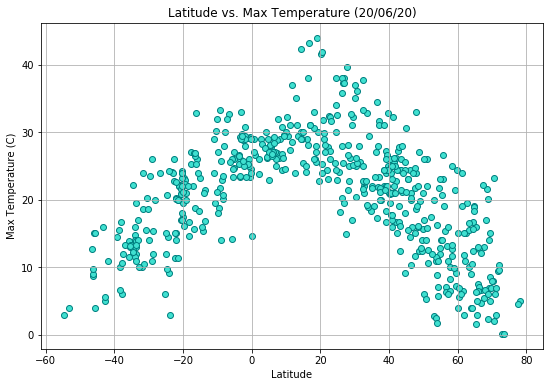

In [20]:
# Plot Latitude vs. Temperature
fig, ax = plt.subplots(figsize=(9, 6)) 
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values, color = "turquoise", edgecolors= "teal" )
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs. Max Temperature (20/06/20)")
plt.grid()
plt.savefig(f"output_data/Fig1.png")
plt.show()

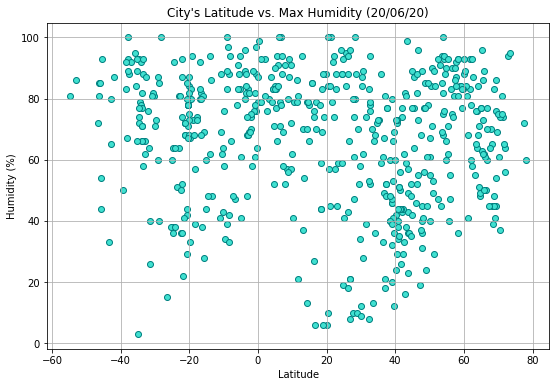

In [21]:
# Plot Latitude vs. Humidity
fig, ax = plt.subplots(figsize=(9, 6)) 
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values, color = "turquoise", edgecolors= "teal")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City's Latitude vs. Max Humidity (20/06/20)")
plt.grid()
plt.savefig(f"output_data/pic2.png")
plt.show()

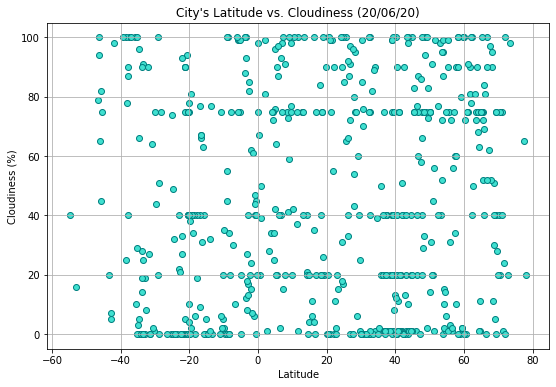

In [22]:
# Plot Latitude vs. Cloudiness
fig, ax = plt.subplots(figsize=(9, 6)) 
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values, color = "turquoise", edgecolors= "teal")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City's Latitude vs. Cloudiness (20/06/20)")
plt.grid()
plt.savefig(f"output_data/pic3.png")
plt.show()

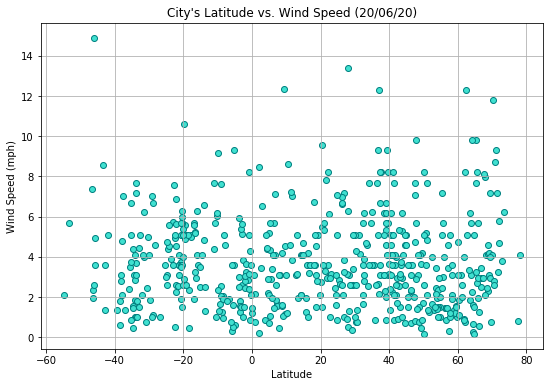

In [23]:
# Plot Latitude vs. Wind Speed
fig, ax = plt.subplots(figsize=(9, 6)) 
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values, color = "turquoise", edgecolors= "teal")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City's Latitude vs. Wind Speed (20/06/20)")
plt.grid()
plt.savefig(f"output_data/pic4.png")
plt.show()

In [24]:
# Create America DataFrames
America_df = clean_city_data[clean_city_data["Lng"]<-30]
America_df.tail(1)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
569,coquimbo,75,CL,1592331133,71,-29.95,-71.34,14.0,4.1


In [25]:
# Create America DataFrames
AfroEuro_df = clean_city_data[(clean_city_data["Lng"]>-30) & (clean_city_data["Lng"]<60)]
AfroEuro_df.tail(1)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
568,bubaque,37,GW,1592331133,86,11.28,-15.83,27.38,7.24


In [26]:
# Create America DataFrames
AsiaAussie_df = clean_city_data[clean_city_data["Lng"]>60]
AsiaAussie_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
559,sidney,14,AU,1592330998,71,-33.87,151.21,13.33,3.10
560,oyek,40,RU,1592331132,93,52.59,104.46,12.00,4.00
565,nelson bay,8,AU,1592331133,87,-32.72,152.15,10.00,5.10
567,surgut,91,RU,1592331133,68,61.25,73.42,19.00,2.00
570,manuk mangkaw,34,PH,1592331133,71,4.80,119.85,28.96,2.88


The r-squared is: 0.05536024163702762


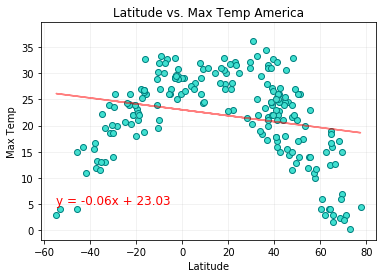

The r-squared is: 0.0013942778777289414


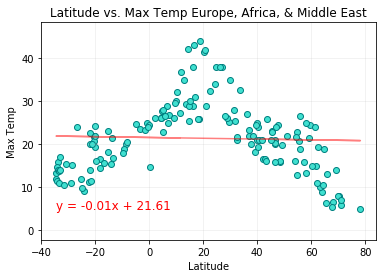

The r-squared is: 0.036367889366180475


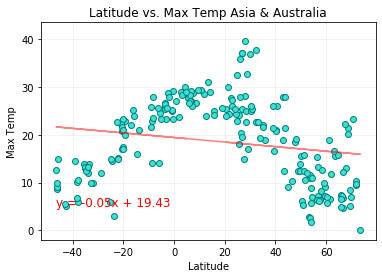

The r-squared is: 0.09415527479039879


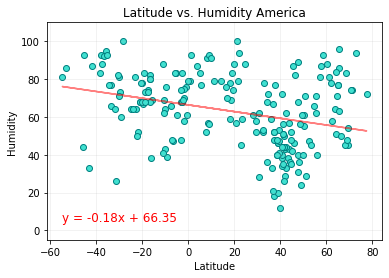

The r-squared is: 1.50086159987531e-05


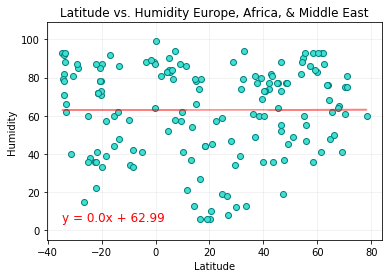

The r-squared is: 0.004198057309772909


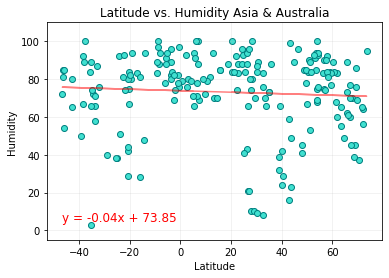

The r-squared is: 0.0008119403245399306


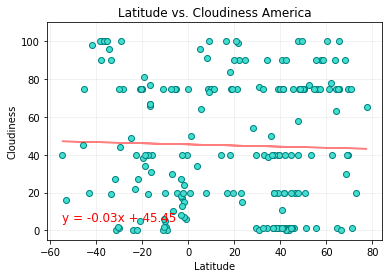

The r-squared is: 0.05908810460355905


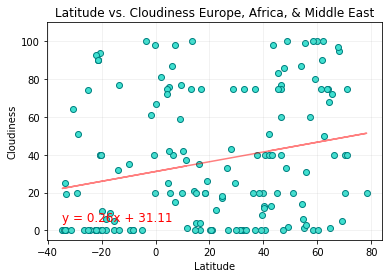

The r-squared is: 0.01578973441428505


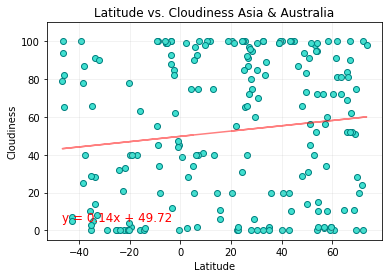

The r-squared is: 0.0003350910484048366


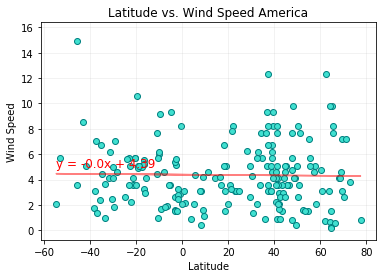

The r-squared is: 0.06084381715039745


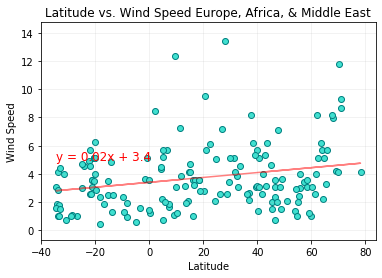

The r-squared is: 0.061517759892368275


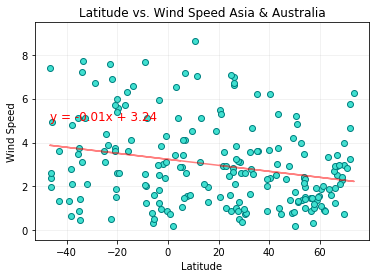

In [28]:
# Call the function to create charts for both Northern and Soujthern Hemisphere 
charts = ['Max Temp','Humidity','Cloudiness', 'Wind Speed']
n_America = 'America'
n_AfroEuro = 'Europe, Africa, & Middle East'
n_AsiaAussie = 'Asia & Australia'

for item in charts :
    my_plot_function(America_df,item,n_America)
    my_plot_function(AfroEuro_df,item,n_AfroEuro)
    my_plot_function(AsiaAussie_df,item,n_AsiaAussie)

In [ ]:
# Create Northern Hemisphere DataFrames
Northern_df = clean_city_data[clean_city_data["Lat"]>0]
Northern_df.tail(1)

In [ ]:
# Create Southern Hemisphere DataFrames
Southern_df = clean_city_data[clean_city_data["Lat"]<=0]
Southern_df.tail(1)